In [ ]:
using Pkg, Revise
gla_dir="../GenLinAlgProblems"
Pkg.activate(gla_dir)
# alternatively, cd into GenLinAlgProblems, start julia, and add the package to dev:   pkg> dev .
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, SymPy, Random

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")

include(gla_dir*"/src/ge.jl");

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">Linear Independence of Vectors</strong></div>

# 1. Linear Independence

We will use a $A x = b$ problem as a motivating example for this discussion.

Since the notion of a **vector** will be generalized to any kind of mathematical object
for which we can write and manipulate linear combinations in a way similar to vectors in $\mathbb{R}^N$, the definitions are carefully worded to continue to apply.

# 1.1 Model $A x = b$ Problem

Let us look at $A x = b$,where

$\qquad
A = \left(\begin{array}{6r}
  1 &  0 &  1 & 0 &  2 & -1 \\
 -2 &  1 & -3 & 0 & -1 &  3 \\
 -1 &  0 & -1 & 1 &  0 &  0 \\
  0 & -2 &  2 & 1 & -4 & -3 \\
\end{array}\right),\quad
b = \left(\begin{array}{r}  1 \\ 0\\ 1\\ -2\end{array}\right) %\label{eq1}\tag{1}
$

and its equivalent column view

$\qquad
x_1 \left(\begin{array}{r}\ 1 \\ -2 \\ -1 \\ \ 0 \end{array}\right) +
x_2 \left(\begin{array}{r}\ 0 \\\  1 \\\  0 \\ -2 \end{array}\right) +
x_3 \left(\begin{array}{r}\ 1 \\ -3 \\ -1 \\ \ 2 \end{array}\right) +
x_4 \left(\begin{array}{r}\ 0 \\\  0 \\\  1 \\ \ 1 \end{array}\right) +
x_5 \left(\begin{array}{r}\ 2 \\ -1 \\ \ 0 \\ -4 \end{array}\right) +
x_6 \left(\begin{array}{r}-1 \\\  3 \\ \ 0 \\ -3 \end{array}\right) =
\left(\begin{array}{r} \ 1 \\\ 0\\\ 1\\ -2\end{array}\right) %\label{eq2}\tag{2}
$

Let us name the columns in $A$ $v_1, v_2, \dots, v_6$ where the index $i$ in $a_i$ is the corresponding column index in $A$. The column view is

$\qquad
x_1 v_1 + x_2 v_2 + \dots + x_6 v_6 = b   %\label{eq3}\tag{3}
$

Let us solve $A x = b$ (the example was chosen to reduce to *reduced row echelon* form for simplicity):

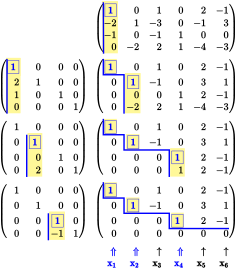

In [2]:
A =[ 1 0 1 0 2 -1; -2 1 -3 0 -1 3; -1 0 -1 1 0 0; 0 -2 2 1 -4 -3 ]; b = [1;0;1;-2];
v1=A[:,1]; v2=A[:,2]; v3=A[:,3]; v4=A[:,4]; v5=A[:,5]; v6=A[:,6]

matrices, pivot_cols, desc = reduce_to_ref( A; gj=false )

ge( matrices, desc, pivot_cols; tmp_dir="/tmp" )

We see that $x_3, x_5$ and $x_6$ are free variables. The solution is easy to read out, one column at a time:
The particular solution is obtained by setting the free variables equal to zero, i.e.,
$x_3 = 0, x_5 = 0, x_6 = 0$ in the original problem; The homogeneous solutions are obtained
by setting each one of the free variables to 1 in turn. The result is as follows,
with the free variable entries colored red:

$\qquad
x =         \begin{pmatrix} 1 \\ 2 \\ \color{red}{0} \\ 2 \\ \color{red}{0} \\ \color{red}{0} \end{pmatrix}
  + \alpha  \begin{pmatrix}-1 \\ 1 \\ \color{red}{1} \\ 0 \\ \color{red}{0} \\ \color{red}{0} \end{pmatrix}
  + \beta   \begin{pmatrix}-2 \\-3 \\ \color{red}{0} \\-2 \\ \color{red}{1} \\ \color{red}{0} \end{pmatrix}
  + \gamma  \begin{pmatrix} 1 \\-1 \\ \color{red}{0} \\ 1 \\ \color{red}{0} \\ \color{red}{1} \end{pmatrix}
$

Look carefully at the free variables in the solution:
* the particular solution is obtained by setting each of the free variables equal to zero.
* the homogeneous solution $\alpha x_{H 1}$ is obtained by setting $\alpha=1$, and the remainig free variables equal to zero
* the remaining free variables are obtained similarly.

Now look at Eq(2) and Eq(3) above: setting the free variables $x_3=0, x_5=0$ and $x_6=0$ **is equivalent to dropping columns 3,5 and 6 in $A$**<br>
The result is the reduced problem

$\qquad
x_1 v_1 + x_2 v_2 + x_4 v_4 = b, \quad x_3=0, x_5=0, x_6=0.
$

<div style="background-color:#F2F5A9;color:black;">

* Dropping non-pivot columns $v_3, v_5$ and $v_6$ of
    $A = \left( v_1 \ v_2 \ v_3 \ v_5 \ v_6 \right)$
results in a problem $\left( v_1\  v_2\  v_4 \right) x = b$<br>
that has a unique solution for the right hand side $b$.
</div>

---
Let's look at the homogeneous problem,i.e., take $b=0$ in Eq(3):  $$x_1 v_1 + x_2 v_2 + \dots x_6 v_6 = 0.$$

We can plug in each of the homogeneous solution vectors to see that we have linear relationships of the columns that add up to 0:
* for $\alpha=1, \beta=0,\gamma=0$, we see that $\quad - v_1 + v_2 + v_3 =0$.
* for $\alpha=0, \beta=1,\gamma=0$, we see that $\quad -2 v_1 -3 v_2 -2 v_4 =0$.
* for $\alpha=0, \beta=0,\gamma=1$, we see that $\quad  v_1 - v_2 + v_4 +v_6 =0$.

<div style="background-color:#F2F5A9;color:black;">

* Note that these relationships mean that there is a vector of the $v_i, \ i=1,2,\dots 6$ that can be expressed as a linear combination of the remaining vectors.
</div>


In fact, these relationships are trivial to see in the reduced row echelon form that we computed above.
Once we drop the non-pivot columns however, there is no linear combination of the remaining pivot columns
adding to zero other than the trivial one:

* Dropping non-pivot columns $v_3, v_5$ and $v_6$ of $A = \left( v_1 \ v_2 \ v_3 \ v_5 \ v_6 \right)$,
the problem  $(v_1 v_2 v_4) = 0 \Leftrightarrow x_1 v_1 + x_2 v_2  + x_4 v_4  = 0$ has unique solution $x_1 =0, x_2=0, x_4=0$.
    
<div style="background-color:#F2F5A9;color:black;">

* Note that this means that that there is no pivot column vector that can be expressed as a linear combination of the remaining pivot column vectors.

</div>


---
A moment's reflection leads to the conclusion that this pattern holds true in general. Hence the definition

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A given set of vectors $\left\{ v_1, v_2, \dots v_n \right\}$ is **linearly dependent** iff
there are non-zero solutions $\alpha_1, \alpha_2, \dots \alpha_n$ for the equation

$\qquad\alpha_1 v_1 + \alpha_2 v_2 + \dots \alpha_n v_n = 0 \Leftrightarrow \sum_{i=1}^n{\alpha_i v_i} = 0.$

Otherwise, the vectors are **linearly independent**.
</div>

**Remark:** The definition is usually stated the otherway around:<br>
 A given set of vectors $\left\{ v_1, v_2, \dots v_n \right\}$ is **linearly independent** iff
$\alpha_1 v_1 + \alpha_2 v_2 + \dots \alpha_n v_n = 0$ has unique solution
$\alpha_1=0, \alpha_2=0, \dots \alpha_n=0$.<br>
Otherwise, the vectors are **linearly dependent.**

**Remark:** This definition works for all vectors. For the special case of vectors in $\mathbb{F}^N$,
the defining equation can be rewritten as
$\begin{pmatrix} v_1 & v_2 & \dots & v_n \end{pmatrix} x = 0$,
where the vectors $v_i$ are written into the matrix as columns.<br>
Gaussian elimination then shows that the vectors are linearly independent iff this matrix has a pivot in every column.
**This is a theorem, not a definition!**

# 2. Checking Linear Independence of a set of vectors in $\mathbb{F}^{\small{N}}$

## 2.1 Easy case 1: The set of vectors contains the zero vector

Look at a set of vectors $\left\{ v_1, v_2, \dots 0 \dots v_n \right\}$. Since

$\qquad 0 v_1 + 0 v_2 + \dots + {\color{red}{\alpha}\ 0} \dots + 0 v_n = 0$

is satisfied for an $\alpha \ne 0$,
we have a non-zero solution  $(0\ 0\ \dots \ \alpha \dots 0)$ for the equation used to define linear independence:<br>
this set is **linearly depyendent**.

## 2.2 Easy case 2: One of the vectors is recognized as a linear combination of the other vectors.

Look at the set of vectors

$\qquad\left\{
v_1=\begin{pmatrix} 1 \\ 2 \\ 3  \end{pmatrix},
v_2=\begin{pmatrix} 4 \\ 3 \\ 2  \end{pmatrix},
v_3 = \begin{pmatrix} 5 \\ 5 \\ 5  \end{pmatrix}
\right\}
$

By inspection, $v_3 = v_1 + v2 \Leftrightarrow 1 v_1 + 1 v_2 -1 v_3 = 0.$<br>
The vectors are **linearly dependent.**

## 2.3 Easy case 3: More vectors than entries in a vector

Look at the set of vectors

$\qquad\left\{
 \begin{pmatrix} 1 \\ 2 \\ 3  \end{pmatrix},
 \begin{pmatrix} 4 \\ 3 \\ 2  \end{pmatrix},
 \begin{pmatrix} 8 \\ 8 \\ 4  \end{pmatrix},
 \begin{pmatrix} 5 \\ 9 \\ 3  \end{pmatrix}
\right\}
$

Writing these vectors into a matrix as columns, we see that the matrix

$\qquad
 \begin{pmatrix} 1 & 4 & 8 & 5 \\ 2 & 3 & 8 & 9 \\ 3 & 2 & 4 & 3  \end{pmatrix}
$

has more columns than rows: it can have at most 3 pivots, one in each row,
and therefore will have at least one column without a pivot.<br>
The vectors are **linearly dependent.**

## 2.4 Easy case 4: The vectors contain a triangular matrix

Look at the set of vectors

$\qquad\left\{
 v_1 = \begin{pmatrix} \color{red}{1} \\ \color{red}{2} \\ 3 \\ \color{red}{4} \\ 5 \end{pmatrix},
 v_2 = \begin{pmatrix} \color{red}{4} \\ \color{red}{0} \\ 5 \\ \color{red}{3} \\ 1 \end{pmatrix},
 v_3 = \begin{pmatrix} \color{red}{8} \\ \color{red}{0} \\ 9 \\ \color{red}{0} \\ 9 \end{pmatrix}
 \right\}
$

Considering only the red entries in $\alpha_1 v_1 + \alpha_2 v_2 + \alpha_3 v_3 = 0$
yields the system

$\qquad
\begin{align}
\alpha_1 + 4 \alpha_2 + 8 \alpha_3 =& 0 \\
2 \alpha_1 =& 0 \\
4 \alpha_1 + 3 \alpha_2 =& 0
\end{align}
$

Writing the rows in the order row 2, row 1, row 3 reveals a triangular matrix, with unique solution $\alpha_1=0, \alpha_2 = 0, \alpha_3 =0$.

The vectors are **linearly independent.**

<div style="background-color:#F2F5A9;color:black;">

**Remark:** Look back at the homogeneous solution Eq(4) above: by construction, **the homogeneous solution vectors
computed by Gaussian elimination** contain the diagonal submatrix $I$ (the free variable rows):
these vectors are **linearly independent.**</div>

# 3: Linear Independence of Functions


The basic idea is to evaluate the defining Eq(5) (and/or its derivatives) at some points $x$, resulting in a problem $A x = 0$.

## 3.1 Polynomials

Consider the set of functions $\left\{ 1, x, x^2, x^3 \right\}$ defined for $-\infty < x < \infty$.
Verify that these functions are **linearly independent.**

We need to solve $\alpha + \beta x + \gamma x^2 + \delta x^3 = 0, \quad -\infty < x < \infty$ for $\alpha, \beta, \gamma$.

Since this equation is differentiable, let us take some derivatives:

$\qquad
\begin{align}
&\alpha +& \beta x +& \gamma x^2 +& \delta x^3 &= 0 &\quad \text{ defining equation}\\
&        &\beta  +& 2 \gamma x +& 3 \delta x^2 &= 0 &\quad \text{ first derivative}\\
&        &        & 2 \gamma +& 6 \delta x     &= 0 &\quad \text{ second derivative}\\
&        &        &           & 6 \delta       &= 0 &\quad \text{ third derivative}
\end{align}
$

Substituting $x=0$ (it is in the domain  $-\infty < x < \infty$), yields $\alpha=0, \beta=0, \gamma=0, \delta=0$<br>
as required.

---
Consider the functions $\left\{ 1+x, 1-x, x^2, 1+x^2 \right\}$ defined for $-\infty < x < \infty$.

Proceeding as before, we set

$\qquad
\alpha (1+x) + \beta (1-x) + \gamma x^2 + \delta (1+x^2) = 0
$

Substituting $x = 0, x=1, x=-1, x=2$ yields

$\qquad
\begin{align}
\alpha + \beta + \delta =& 0 \quad \text{ at } x=0\\
2\alpha + \gamma + 2 \delta =& 0 \quad \text{ at } x=1\\
2\beta + \gamma + 2\delta =& 0 \quad \text{ at } x=-1\\
3 \alpha - \beta + 4 \gamma + 5 \delta =& 0 \quad \text{ at } x=2\\
\end{align}
$

This system has a free variable! One solution is

$\qquad
\alpha = -1, \beta= -1, \gamma=-2, \delta=2.
$

We might just have happened to pick $x$ values that lead to a system with one or more free variables.
Adding equations with other values of $x$. We get the same result. Substituting these parameters in our original equations
shows that

$\qquad
-(1+x)-(1-x) -2 x^2 -2 (1+x^2) = 0
$

holds for all values of $x$: these functions are **linearly dependent.**